# __Food & Beverages__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Food & Beverages is divided into _three_ subcategories: 

# __3. Restaurant :__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Food & Beverages/restarunt refresh.csv")
df.head()

,text,sentiment
0,i don' t call india the land of thalis lightly...,Neutral
1,landed in bangalore airport pleasantly surpri...,Positive
2,i want to open a vegan restaurant in bangalore...,Positive
3,blr airport bbmp comm it was surprising to...,Negative
4,even though bangalore airport may have the wor...,Positive


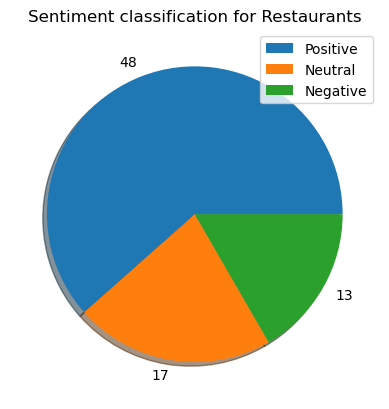

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
resta_count = val.values

#Plotting a pie chart
plt.pie(resta_count, labels = resta_count, shadow= True)
plt.title("Sentiment classification for Restaurants")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding restaurants:

### Topic Modelling

In [4]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = ["amp","international","dhaba","malgudi","fancy","boyzone","recycle","kiosk","idli","meltwith","pvt","organic"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 15
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: just, outside, restaurants, like, days, make, awesome, shops, open, area
Topic 2: restaurants, open, security, check, counters, restaurant, lots, lively, beautiful, say
Topic 3: restaurant, card, number, beautiful, night, like, flight, just, restaurants, love
Topic 4: restaurant, place, single, eat, outside, inside, non, jm_scindia, thanks, small
Topic 5: small, restaurants, look, going, restaurant, like, money, atm, run, employment
Topic 6: south, indian, restaurant, food, new, nice, going, coffee, restaurants, like
Topic 7: love, restaurant, food, terminal, restaurants, like, outside, inside, better, beautiful
Topic 8: restaurant, restaurants, like, love, outside, food, inside, better, beautiful, coffee
Topic 9: restaurants, flight, like, better, wow, make, hope, lots, windmills, run
Topic 10: restaurant, india, lounge, really, restaurants, immigration, night, area, shops, security
Topic 11: nice, restaurant, sure, delhi, say, shops, outside, area, lively, really
Topic 12: r

/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

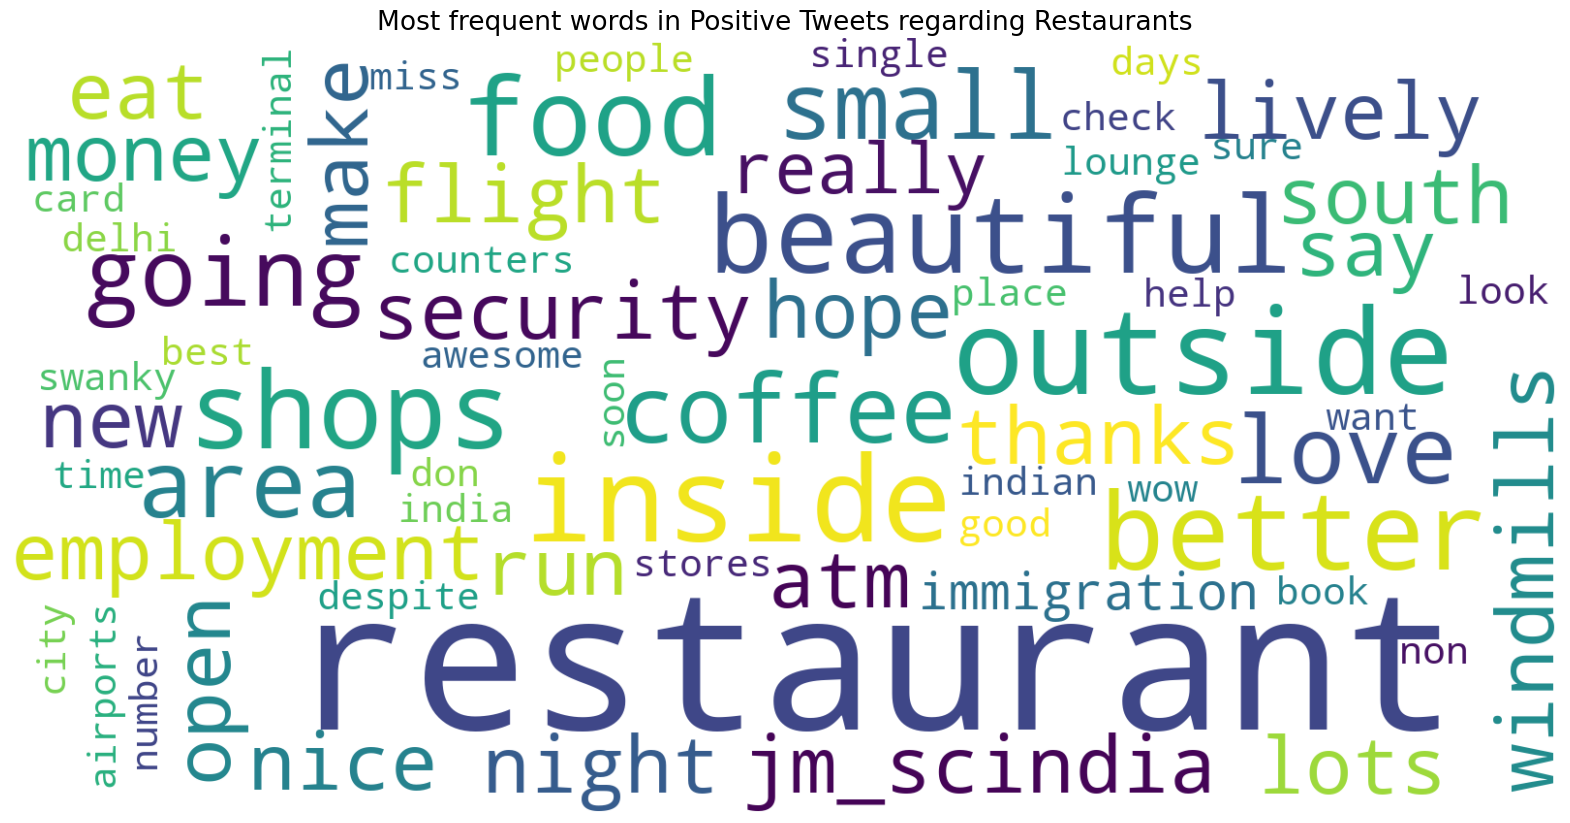

In [5]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Restaurants', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Restaurants
#### 1. Windmills cafe and restaurants offer the best food according to public's opinion
#### 2. Variety of food options available to choose from
#### 3. The servers and staff are well behaved

## b.Topic modelling and wordcloud for negative tweets regarding Restaraunts:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = ["sick","shouting","unhealthy","mid","reddy","pathetic","coke","scam","swiggy"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 5
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 7
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: literally, experience, restaurant, restaurants, huge, blr, people
Topic 2: restaurant, huge, literally, restaurants, experience, blr, people
Topic 3: food, restaurants, people, small, blr, restaurant, huge
Topic 4: restaurants, huge, experience, restaurant, blr, people, small
Topic 5: restaurants, restaurant, huge, blr, people, experience, small


### Word Cloud

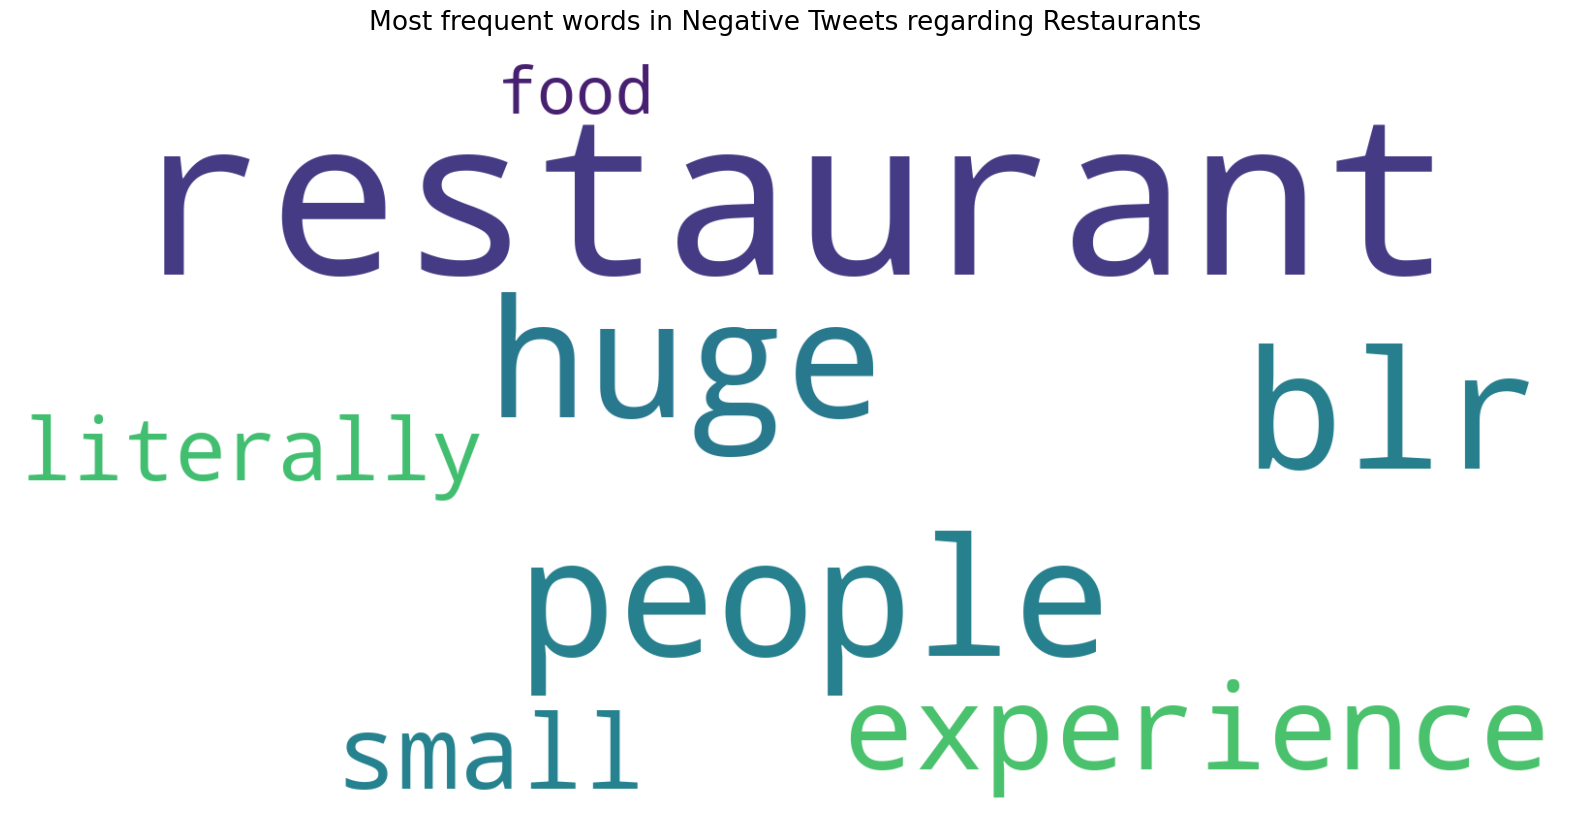

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Restaurants', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Restaurants
#### 1. One of the travellers has notices that waste segregation is not conducted properly at the restaurants in international departure
#### 2. Lack of authentic kannadiga restaurants. Also Pure veg restaurants are hard to find
#### 3. Travellers complain about food not being available at restaurants after 11 pm. When they were hungry the only thing they could find was small snacks shops